In [1]:
%%bash
df -h .

Filesystem      Size  Used Avail Use% Mounted on
beegfs_nodev    175T  161T   15T  92% /mnt/pfs


In [2]:
import warnings

warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import numpy as np

import gwpy

print(gwpy.__version__)

import matplotlib.pyplot as plt

3.0.8


In [3]:
%%bash
hostname

sonic13


In [5]:
from gwosc.datasets import event_gps

gps0 = event_gps("GW150914") + 10

print(gps0)

1126259472.4


In [6]:
segment0 = (int(gps0) + 10 - 0.5, int(gps0) + 10 + 0.5)

In [7]:
print(segment0)

(1126259481.5, 1126259482.5)


In [8]:
sf = 4096

In [9]:
from gwpy.timeseries import TimeSeries

# ldata0 = TimeSeries.fetch_open_data('L1', *segment0, verbose=True)

# data_file_name = "Entire_noise_ts_gpsT1126259462_R200_D8_S4096_A1.txt"
data_file_name = "Entire_noise_ts_gpsT1126259462_R512_D16_S4096_A0.5.txt"

req_duration = 30

ldata0f = TimeSeries.read(data_file_name)[: req_duration * sf]

In [10]:
N0 = len(ldata0f)
# N1 = len(ldata1)

N0  # , N1

122880

In [11]:
N0 / 4096

30.0

In [12]:
# ldata1.write("GW150914_af_16s.txt")

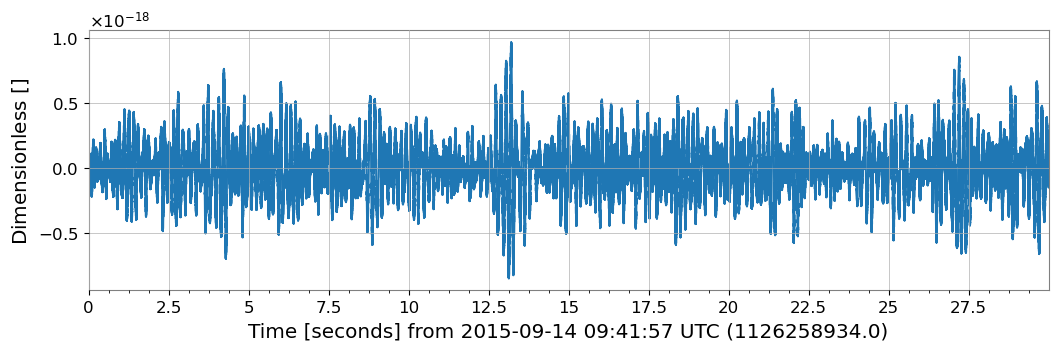

In [13]:
plot0 = ldata0f.plot()

In [14]:
np.mean(ldata0f)

<Quantity -1.83237903e-22>

In [15]:
ldata0f.times[-1] - ldata0f.times[0]

<Quantity 29.99975586 s>

In [25]:
# Cij_file_name = "Cij_gpsT1126259462_R200_D8_S4096_A1.npy"
# Cij_file_name = f"Cij_gpsT1126259472_R128_D4_S4096_A0.02_N1000.npy"
Cij_file_name = f"Cij_gpsT1126259462_R512_D16_S4096_A0.5_N1000.npy"

In [26]:
Cij = np.load(Cij_file_name)

In [27]:
Cij.shape

(2048, 2048)

In [28]:
np.linalg.det(Cij)

0.0

In [29]:
Lij = np.linalg.cholesky(Cij)

In [30]:
Lij

array([[ 2.37623841e-19,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.35919972e-19,  2.84052213e-20,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.32542630e-19,  4.22020701e-20,  2.46576620e-20, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.42669274e-20,  6.69183323e-21,  1.78247246e-20, ...,
         1.82855441e-21,  0.00000000e+00,  0.00000000e+00],
       [ 2.52560569e-20, -6.75959335e-21,  1.32735524e-20, ...,
         1.69964783e-21,  1.82855393e-21,  0.00000000e+00],
       [ 2.68309285e-20, -1.15651499e-20,  6.13971025e-22, ...,
         1.31506631e-21,  1.69964938e-21,  1.82855185e-21]])

In [31]:
inv_Lij = np.linalg.inv(Lij)

In [32]:
inv_Cij = np.linalg.inv(Cij)

In [19]:
np.save(f"inj{Cij_file_name}", inv_Cij)

In [16]:
inv_Cij = np.load(f"inj{Cij_file_name}")

In [45]:
inv_Cij @ Cij

array([[ 1.00000000e+00, -2.06362579e-13, -5.33462407e-13, ...,
         2.64251568e-11,  2.59874371e-11,  2.83680876e-11],
       [ 7.69229926e-11,  1.00000000e+00,  7.47588940e-11, ...,
         4.25431493e-11,  4.27627483e-11,  3.58207181e-11],
       [-2.31152077e-10, -2.28300613e-10,  1.00000000e+00, ...,
        -2.14973524e-10, -2.13604918e-10, -2.05746101e-10],
       ...,
       [ 1.17015026e-13, -7.21089984e-13,  3.50142201e-13, ...,
         1.00000000e+00, -2.23477593e-12,  2.42200000e-14],
       [-1.22140678e-13, -2.89554951e-13, -4.33305691e-13, ...,
         2.23893255e-12,  1.00000000e+00, -1.00985292e-12],
       [ 8.22405528e-13,  3.91997224e-13,  9.85976572e-13, ...,
         5.24760552e-13,  1.85707139e-12,  1.00000000e+00]])

In [23]:
Lij @ inv_Lij

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.06362905e-16,  1.00000000e+00,  1.09544348e-15, ...,
         1.91687629e-16, -1.97448622e-16,  0.00000000e+00],
       [-2.41405111e-15, -2.34007211e-15,  1.00000000e+00, ...,
         1.04894714e-17, -3.02259503e-17,  0.00000000e+00],
       ...,
       [-5.07398040e-16, -2.52985683e-15, -1.64351453e-15, ...,
         1.00000000e+00, -5.73199630e-17,  0.00000000e+00],
       [-1.85763179e-15, -2.71814348e-16, -2.78210718e-15, ...,
        -3.46532574e-17,  1.00000000e+00,  0.00000000e+00],
       [-8.10703325e-16,  2.74988718e-15, -3.18506410e-15, ...,
        -7.26649850e-16,  1.11758579e-16,  1.00000000e+00]])

# Inject the signal

In [33]:
time_axis = np.array(ldata0f.times)

In [35]:
Msun = 2 * 1e30
G = 6.6743 * 1e-11
c = 2.99792458 * 1e8
Mevent = 62

Tc = G * Msun * Mevent / (c**3)

In [36]:
Tc

0.0003071604534396641

In [37]:
# Full fata duration
len(time_axis) / sf

30.0

In [24]:
ans_dur = 0.02

In [33]:
def signal_generator(x):

    A0, omega0, gamma0, t0, phi0 = x

    start_ind = np.argmin(abs(time_axis - t0))

    local_time_axis = np.linspace(0, ans_dur, int(ans_dur * sf))

    func = (
        A0
        * np.cos(omega0 * (local_time_axis) + phi0)
        * np.exp(-gamma0 * (local_time_axis))
    )

    signal = np.zeros(len(time_axis))

    signal[start_ind : start_ind + int(ans_dur * sf)] = func

    return signal


def get_damped_sinusoid(time_axis, x):

    A, omega, gamma, t, phi = x
    return A * np.cos(omega * (time_axis - t) + phi) * np.exp(-gamma * (time_axis - t))

In [34]:
time_axis[40]

1126259340.0097656

In [35]:
full_data = ldata0f

In [36]:
len(time_axis)

122880

In [37]:
250

250

In [38]:
def whiten(x):

    return np.dot(inv_Lij, x)


def inner_product(x, y):

    xbar = whiten(x)
    ybar = whiten(y)

    return np.dot(xbar, ybar)

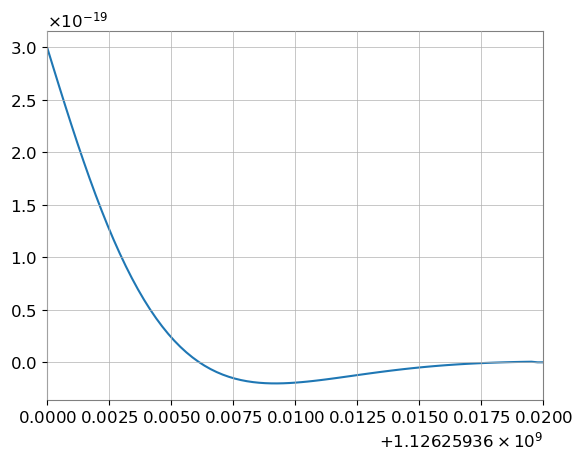

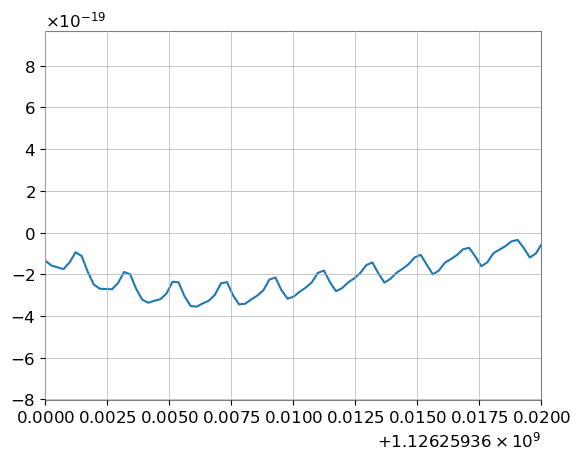

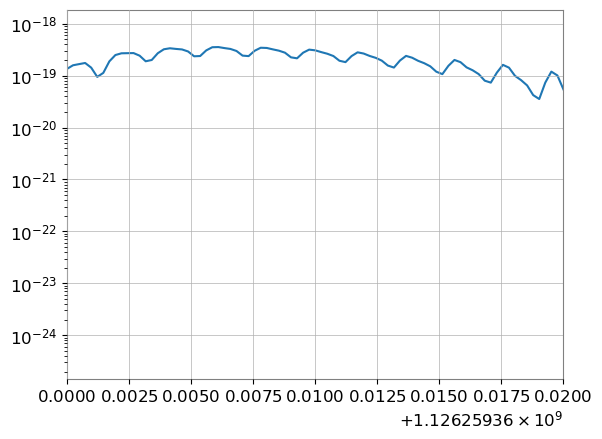

Matched filter SNR 14.581423859663085


In [132]:
A0 = 3e-19
omega0 = 250  # omega_exp.real
gamma0 = 250  # abs(omega_exp.imag)
t0 = time_axis[20 * sf]
phi0 = 0

# time_axis_0 = time_axis[req_duration*sf:(req_duration+1)*sf]

signal = signal_generator([A0, omega0, gamma0, t0, phi0])


analysis_data = full_data + signal - np.mean(full_data)

plt.plot(time_axis, signal)
plt.xlim(t0, t0 + ans_dur)
# plt.ylim(-2e-21, 2e-21)
plt.show()


plt.plot(time_axis, analysis_data)
plt.xlim(t0, t0 + (ans_dur))
# plt.ylim(-2e-21, 2e-21)
plt.show()


plt.semilogy(time_axis, abs(analysis_data))
plt.xlim(t0, t0 + (ans_dur))
# plt.ylim(-2e-21, 2e-21)
plt.show()

data_seg = analysis_data[20 * sf : 20 * sf + int(ans_dur * sf)]
signal_seg = signal[20 * sf : 20 * sf + int(ans_dur * sf)]
time_seg = time_axis[20 * sf : 20 * sf + int(ans_dur * sf)]

# signal_seg_norm = np.dot(signal_seg, inv_Cij@signal_seg)
signal_seg_norm = inner_product(signal_seg, signal_seg)

# signal_seg_norm = np.dot(signal_seg, inv_Cij@signal_seg)

# data_sig_inner_prod = np.dot(data_seg, inv_Cij@signal_seg)
data_sig_inner_prod = inner_product(data_seg, signal_seg)

mf_snr = data_sig_inner_prod / np.sqrt(signal_seg_norm)

print("Matched filter SNR", mf_snr)

In [40]:
int(ans_dur * sf)

81

In [34]:
len(signal_seg)

81

In [35]:
Cij.shape

(81, 81)

In [36]:
mf_snr

<Quantity 14.58142386>

In [41]:
analysis_data = np.array(analysis_data)

In [42]:
sf

4096

In [43]:
x0 = np.array([A0, omega0, gamma0, t0, phi0])

In [133]:
def TimeDomainLogLiklihood(dx):

    # A, omega, gamma, t0, phi0 = x
    # A, omega, gamma, phi = x
    # omega, gamma, t = x
    # dA, domega, dgamma, dt, dphi = dx
    dA, domega, dgamma, dphi = dx
    # dA = 0
    dt = 0
    # dphi = 0

    # t = t0
    # print(f"A {A}, omega {omega}, gamma {gamma}, t0 {t0}, phi0 {phi0}")

    # X0 =
    A = A0 + dA
    omega = omega0 + domega
    gamma = gamma0 + dgamma
    t = t0 + dt
    phi = phi0 + dphi

    # xf = x0 + dx

    # t = xf[-2]

    tloc = np.argmin(abs(time_axis - t))

    # print(tloc)

    tloc_end = tloc + int(ans_dur * sf)

    data = analysis_data[tloc:tloc_end]
    cdata = data - np.mean(data)

    # print(len(data)/sf)

    local_time_axis = time_axis[tloc:tloc_end]

    # print(len(local_time_axis)/sf)

    signal = (
        A
        * np.cos(omega * (local_time_axis - t) + phi)
        * np.exp(-gamma * (local_time_axis - t))
    )

    # signal = signal_generator([A0, omega0, gamma0, t0, phi0])

    # print(len(signal))
    # tend signa= 16*sf
    # print(signal, local_time_axis[tloc])
    # plt.plot(local_time_axis, signal)
    # plt.scatter(local_time_axis, data, s=1, alpha=0.3, c='orange')
    # plt.show()
    # signal = s[tloc:tloc+16*sf]

    # print(tloc)
    # print(s[:tloc+10], tloc)

    delta = cdata - signal

    # delta_bar = whiten(delta)

    LnP = (-1 / 2) * (inner_product(delta, delta))

    return LnP

In [41]:
TimeDomainLogLiklihood([1e-22, 25, 20, 2, 0])

ValueError: too many values to unpack (expected 2)

In [37]:
TimeDomainLogLiklihood([0, 0, 0, 0, 0])

<Quantity -14.34847854>

In [39]:
time_axis[0]

1126259254.0

In [40]:
gps0

1126259462.4

In [41]:
A0

1e-21

In [25]:
2 * np.pi * 250,

1570.7963267948965

In [84]:
A0, omega0

(3e-19, 250)

In [134]:
import numpy as np

# Define the dimensionality of our problem.
ndim = 4

# Define our 3-D correlated multivariate normal log-likelihood.
# C = np.identity(ndim)

# lnorm = -0.5 * (np.log(2 * np.pi) * ndim +
#                np.log(np.linalg.det(Cij)))


# Define our uniform prior via the prior transform.
def ptform_omega(u):
    return 5 + u * 10


def ptform_gamma(u):
    return 1 + u * 2


def ptform(u):

    x = np.array(u)

    x[0] = -5e-19 + u[0] * 10e-19

    x[1] = -240 + u[1] * 480
    x[2] = -100 + u[2] * 200
    x[3] = -np.pi / 2 + u[3] * 2 * np.pi / 2
    # x[0] = -5e-16 + u[0]*10e-16
    # x[0] =
    # x[1] =  4 + u[0]*8
    # x[2] =  u[1]*8

    # x[1] = u[1]*25
    # x[1] = -15 + u[1]*30

    # x[2] = -15 + u[2]*30
    # x[2] = u[2]*20
    # x[2] = gps0 +12 + u[2]*6
    # x[3] = gps0 + 0.1 - 8 + u[3]*7

    # x[3] = -2.5 + u[3]*5

    # x[4] = -np.pi/2 + u[4]*2*np.pi/2

    return x

In [203]:
omega_exp

(1705.8677262078243-265.3747340140924j)

In [46]:
A0, omega0, gamma0, t0, phi0

(3e-19, 250, 250, 1126259360.0, 0)

In [53]:
from dynesty import NestedSampler

In [67]:
sampler = NestedSampler(TimeDomainLogLiklihood, ptform, ndim, nlive=100)

In [68]:
sampler.run_nested()

818it [02:24,  1.37s/it, bound: 1033 | nc: 816 | ncall: 158816 | eff(%):  0.515 | loglstar:   -inf < 151.562 <    inf | logz: 141.183 +/-  0.303 | dlogz: 13.546 >  0.109] Traceback (most recent call last):
  File "/mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gwpy/lib/python3.12/site-packages/dynesty/dynesty.py", line 910, in __call__
    return self.func(np.asarray(x).copy(), *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_2410855/2575859809.py", line 51, in TimeDomainLogLiklihood
    LnP = (-1/2) * (np.dot((cdata-signal), np.dot(inv_Cij, (cdata-signal))))
                                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt
818it [02:25,  5.62it/s, bound: 1033 | nc: 816 | ncall: 158816 | eff(%):  0.515 | loglstar:   -inf < 151.562 <    inf | logz: 141.183 +/-  0.303 | dlogz: 13.546 >  0.109]

Exception while calling loglikelihood function:
  params: [ 4.50453133e-17  3.03094959e+00  3.34067043e+00 -4.11462843e-01
  5.99708790e-01]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

In [34]:
import dynesty

In [48]:
from dynesty import DynamicNestedSampler

In [141]:
dsampler = DynamicNestedSampler(
    TimeDomainLogLiklihood, prior_transform=ptform, ndim=ndim, nlive=10000
)

In [114]:
dsampler = DynamicNestedSampler.restore("5param_dev_17May_GW150914_like_inj.h5")

In [46]:
dsampler = DynamicNestedSampler.restore(
    "5param_dev_17May_GW150914_like_inj_sonic_0p02_v3.h5"
)

In [142]:
dsampler.run_nested(
    checkpoint_file="5param_dev_17May_GW150914_like_inj_sonic_0p02_v6.h5"
)

125071it [09:59, 208.72it/s, batch: 0 | bound: 21 | nc: 1 | ncall: 659139 | eff(%): 18.975 | loglstar:   -inf < -13.821 <    inf | logz: -20.718 +/-  0.023 | dlogz:  0.000 >  0.010]  


In [47]:
dsampler.run_nested(resume=True)

/mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gwpy/lib/python3.12/site-packages/dynesty/dynamicsampler.py:2034: RuntimeWarning: You tried to resume the run that has ended successfully.
This is not supported. No sampling was performed
  warnings.warn(


In [143]:
res = dsampler.results
results = res

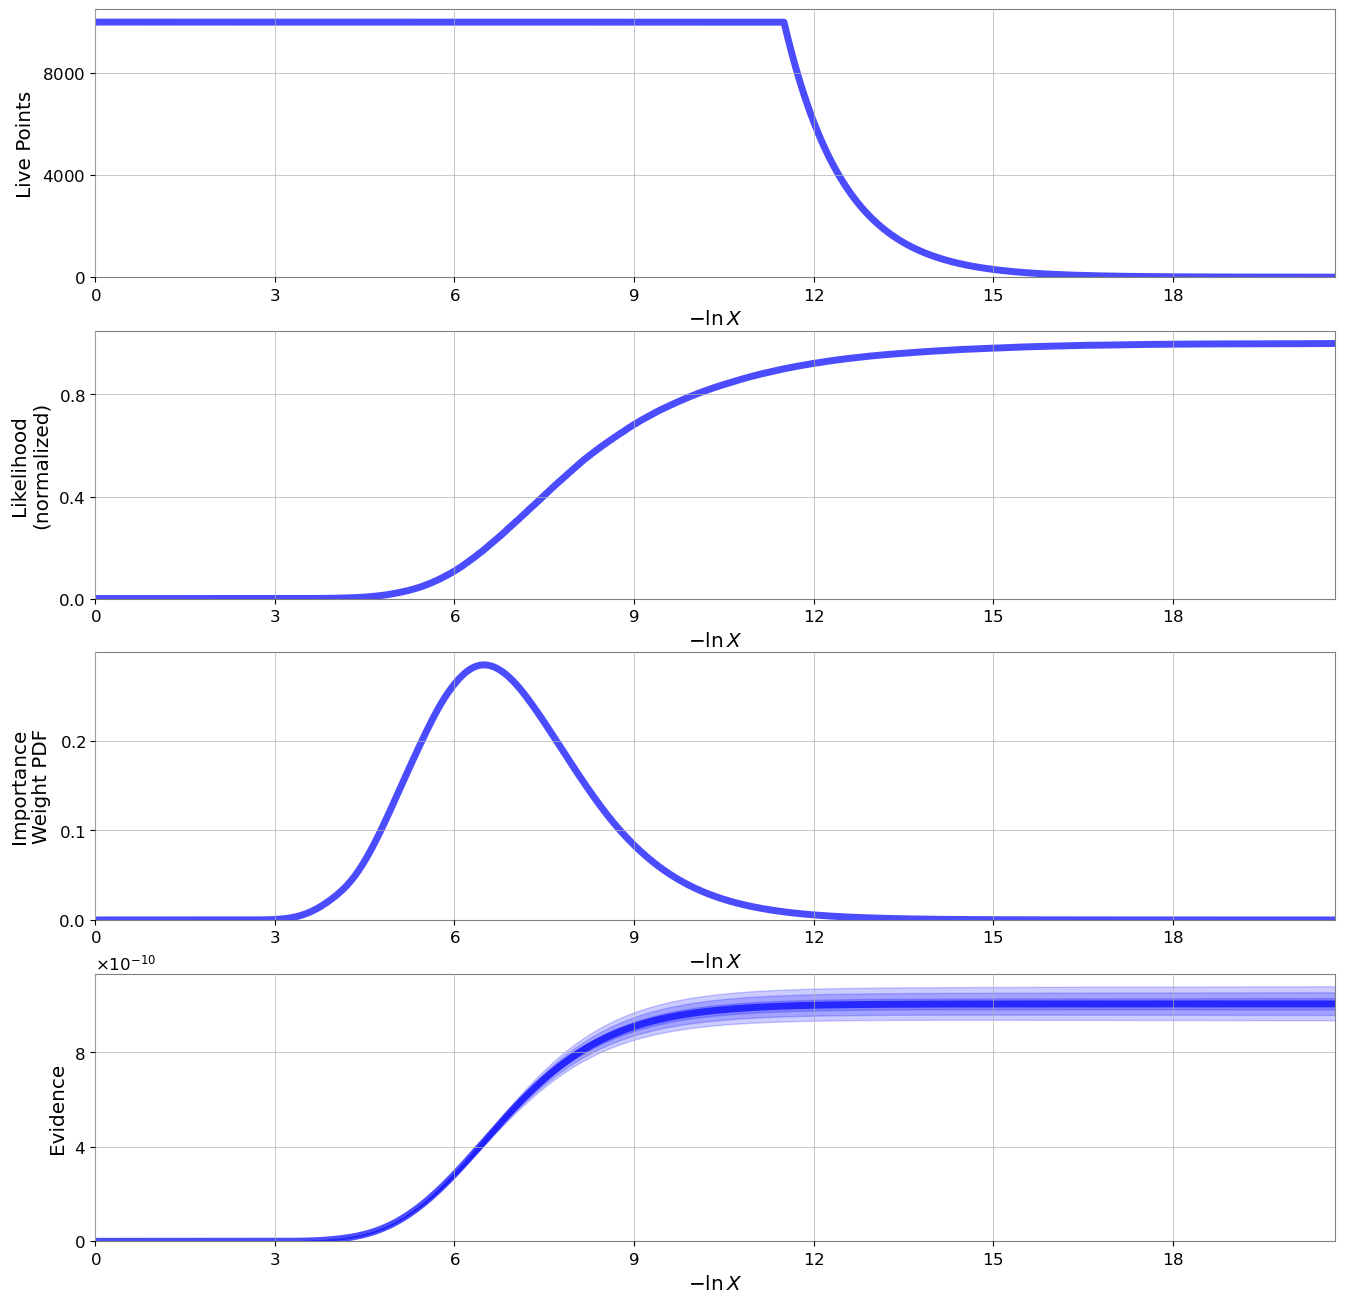

In [144]:
from dynesty import plotting as dyplot

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(res)

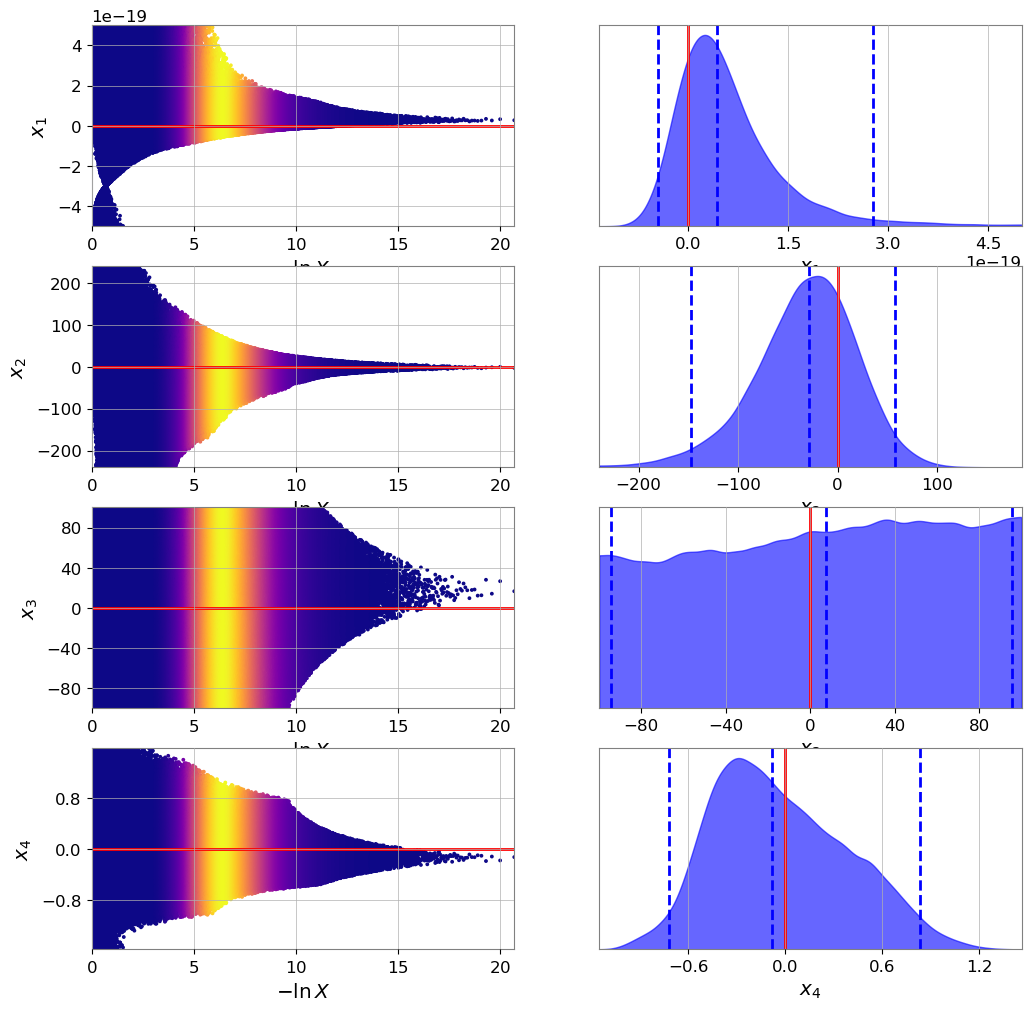

In [145]:
# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(res, truths=[0, 0, 0, 0])

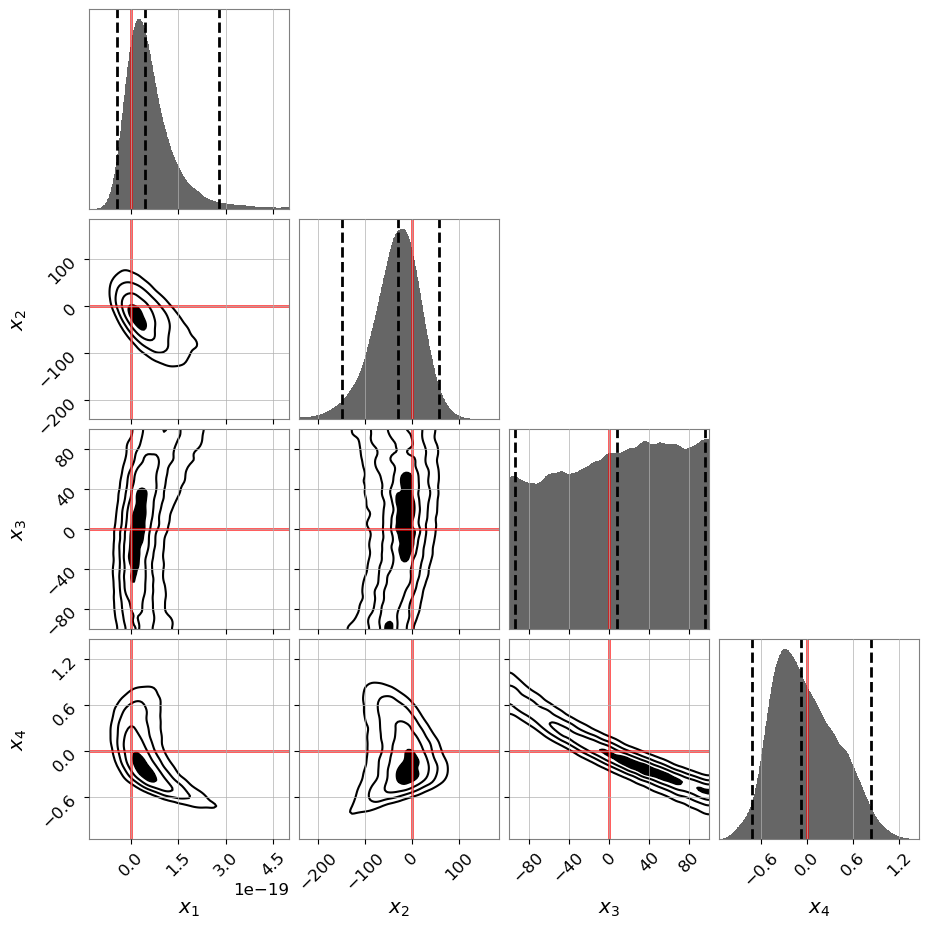

In [146]:
# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(res, truths=[0, 0, 0, 0])

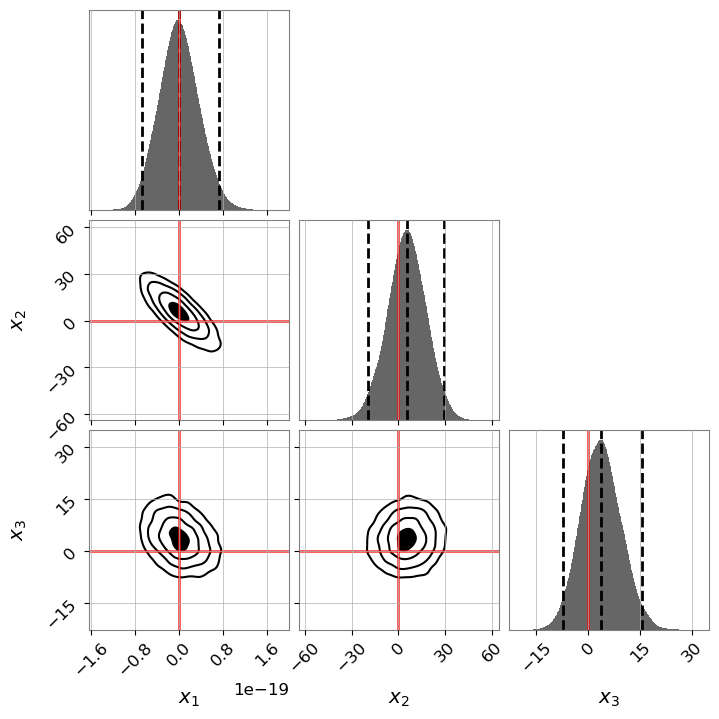

In [130]:
# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(res, truths=[0, 0, 0])

In [116]:
omega0, gamma0

(250, 250)

In [131]:
from dynesty import utils as dyfunc

# Extract sampling results.
samples = results.samples  # samples
weights = results.importance_weights()

# Compute 10%-90% quantiles.
quantiles = [dyfunc.quantile(samps, [0.1, 0.9], weights=weights) for samps in samples.T]

# Compute weighted mean and covariance.
mean, cov = dyfunc.mean_and_cov(samples, weights)

# Resample weighted samples.
samples_equal = results.samples_equal()

# Generate a new set of results with sampling uncertainties.
results_sim = dyfunc.resample_run(results)


sigmas = []
for pind in range(ndim):

    sigmas.append(np.sqrt(cov[pind, pind]))

print(mean, " +- ", sigmas)

[6.10300786e-22 5.38461892e+00 3.67118052e+00]  +-  [3.593851242282611e-20, 12.170473570001231, 5.777030733463904]


In [106]:
print(mean, " +- ", sigmas)

[ 1.83693211e-20 -1.08099441e+01 -3.60752247e+00]  +-  [3.7491895615294976e-20, 38.409115848108186, 18.818838000534274]


In [82]:
t0

1126259360.0

In [84]:
time_seg[0]

1126259360.0

In [106]:
mean

array([4.41788815, 3.75422018])

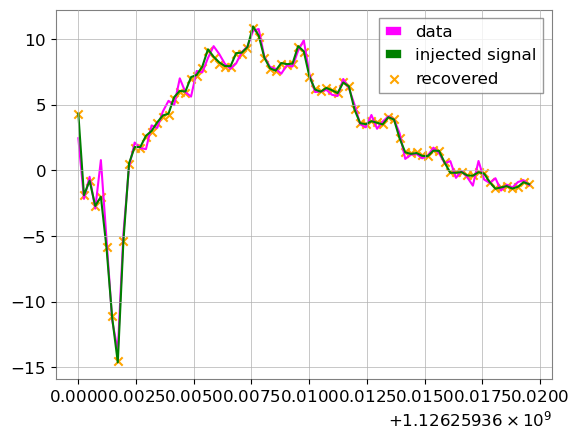

In [121]:
rec_signal_seg = get_damped_sinusoid(
    time_seg, [A0, omega0 + mean[0], gamma0 + mean[1], t0, phi0]
)

plt.plot(time_seg, inv_Lij @ data_seg, label="data", c="magenta")
plt.plot(time_seg, inv_Lij @ signal_seg, label="injected signal", c="green")
plt.scatter(
    time_seg, inv_Lij @ rec_signal_seg, marker="x", c="orange", label="recovered"
)
plt.legend()
plt.show()

In [226]:
import scipy

In [227]:
np.mean(samples.T * weights)

-3.835724480904094e-06

In [228]:
t0

1126259294.0

In [137]:
1.54898278e03 / (2 * np.pi)

246.52826620122585

In [67]:
mean

array([4.41788815, 3.75422018])

In [49]:
x0

NameError: name 'x0' is not defined

In [51]:
mean

array([-1.02596196e-19, -1.17745312e+00,  3.47519253e-02,
       -2.17097859e-01,  1.70983762e-02])

In [53]:
x0

array([1.00000000e-19, 2.70000000e+02, 5.00000000e+01,
       1.12625936e+09, 0.00000000e+00])

In [54]:
mean / x0

/tmp/ipykernel_2546272/317067153.py:1: RuntimeWarning: divide by zero encountered in divide
  mean/x0


array([-1.02596196e+00, -4.36093747e-03,  6.95038505e-04,
       -1.92760093e-10,             inf])

In [115]:
mean[2] - t0

-0.005499124526977539

In [78]:
cov

array([[ 1.05514598e-34, -5.15381450e-19, -4.18746220e-20,
         4.21599871e-19, -1.29365460e-18],
       [-5.15381450e-19,  3.34527585e+01, -8.10469897e-01,
         5.05175687e-03, -1.95935039e-01],
       [-4.18746220e-20, -8.10469897e-01,  7.19377876e+00,
         1.49118873e-03, -2.83245980e-03],
       [ 4.21599871e-19,  5.05175687e-03,  1.49118873e-03,
         2.42176516e-02, -5.76196049e-02],
       [-1.29365460e-18, -1.95935039e-01, -2.83245980e-03,
        -5.76196049e-02,  1.68934261e-01]])

In [83]:
t0 - 1.12625940e09

76.0

In [ ]:
A

1e-18

In [ ]:
phi0

1.0471975511965976

In [ ]:
-1.58880414e00

-1.58880414

In [ ]:
s0 = A * np.cos(omega * (time_axis - t0) + phi0) * np.exp(-gamma * (time_axis - t0))

In [ ]:
A1, omega1, gamma1, t1, phi1 = mean

In [ ]:
s0 = A * np.cos(omega * (time_axis - t0) + phi0) * np.exp(-gamma * (time_axis - t0))

In [ ]:
s1 = A1 * np.cos(omega1 * (time_axis - t1) + phi1) * np.exp(-gamma1 * (time_axis - t1))

In [ ]:
s1 = A1 * np.cos(omega1 * (time_axis - t0) + phi1) * np.exp(-gamma1 * (time_axis - t0))

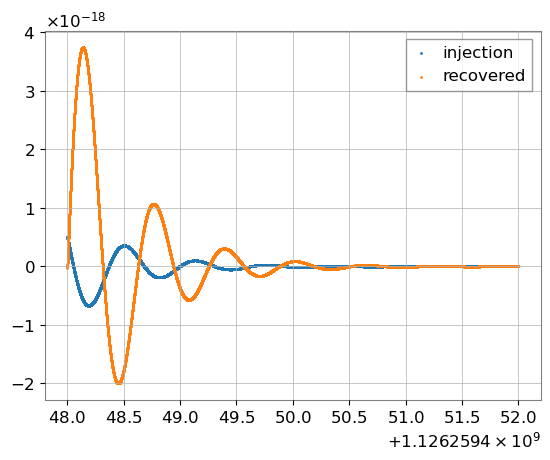

In [ ]:
plt.scatter(time_axis, s0, label="injection", s=1)
plt.scatter(time_axis, s1, label="recovered", s=1)
plt.legend()
plt.show()

In [1]:
import random
import numpy as np

random.seed(0)
N = 10000

V = np.array([[1, 2], [2, 5]])

B = np.linalg.cholesky(V)
A = np.array([1, 2])

# norm() return one number from standard normal distribution
n1 = np.array([random.gauss(0, 1) for _ in range(10000)])
n2 = np.array([random.gauss(0, 1) for _ in range(10000)])
res = np.array([n1, n2]).T.dot(B.T) + A

np.cov(res.T).round()

array([[1., 2.],
       [2., 5.]])

In [3]:
res.shape

(10000, 2)

In [1]:
((17.5**2) ** (3 / 5)) / (35 ** (1 / 5))

15.234634857682169